In [6]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [7]:
train = pd.read_csv('../datasets/train.csv', index_col='PassengerId')
X_test = pd.read_csv('../datasets/test.csv', index_col='PassengerId')
y_test = pd.read_csv('../datasets/gender_submission.csv', index_col='PassengerId')

## Этап 1 - EDA

In [8]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [9]:
train.shape

(891, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

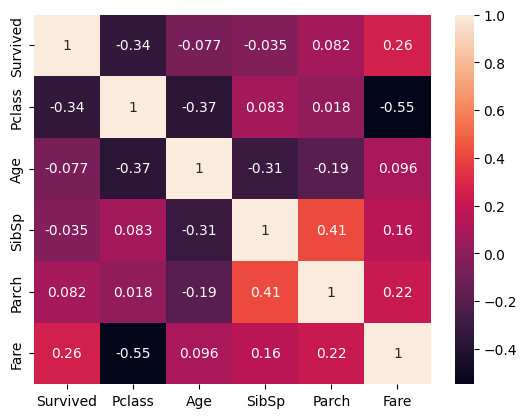

In [13]:
sns.heatmap(train.corr(numeric_only=True), annot=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

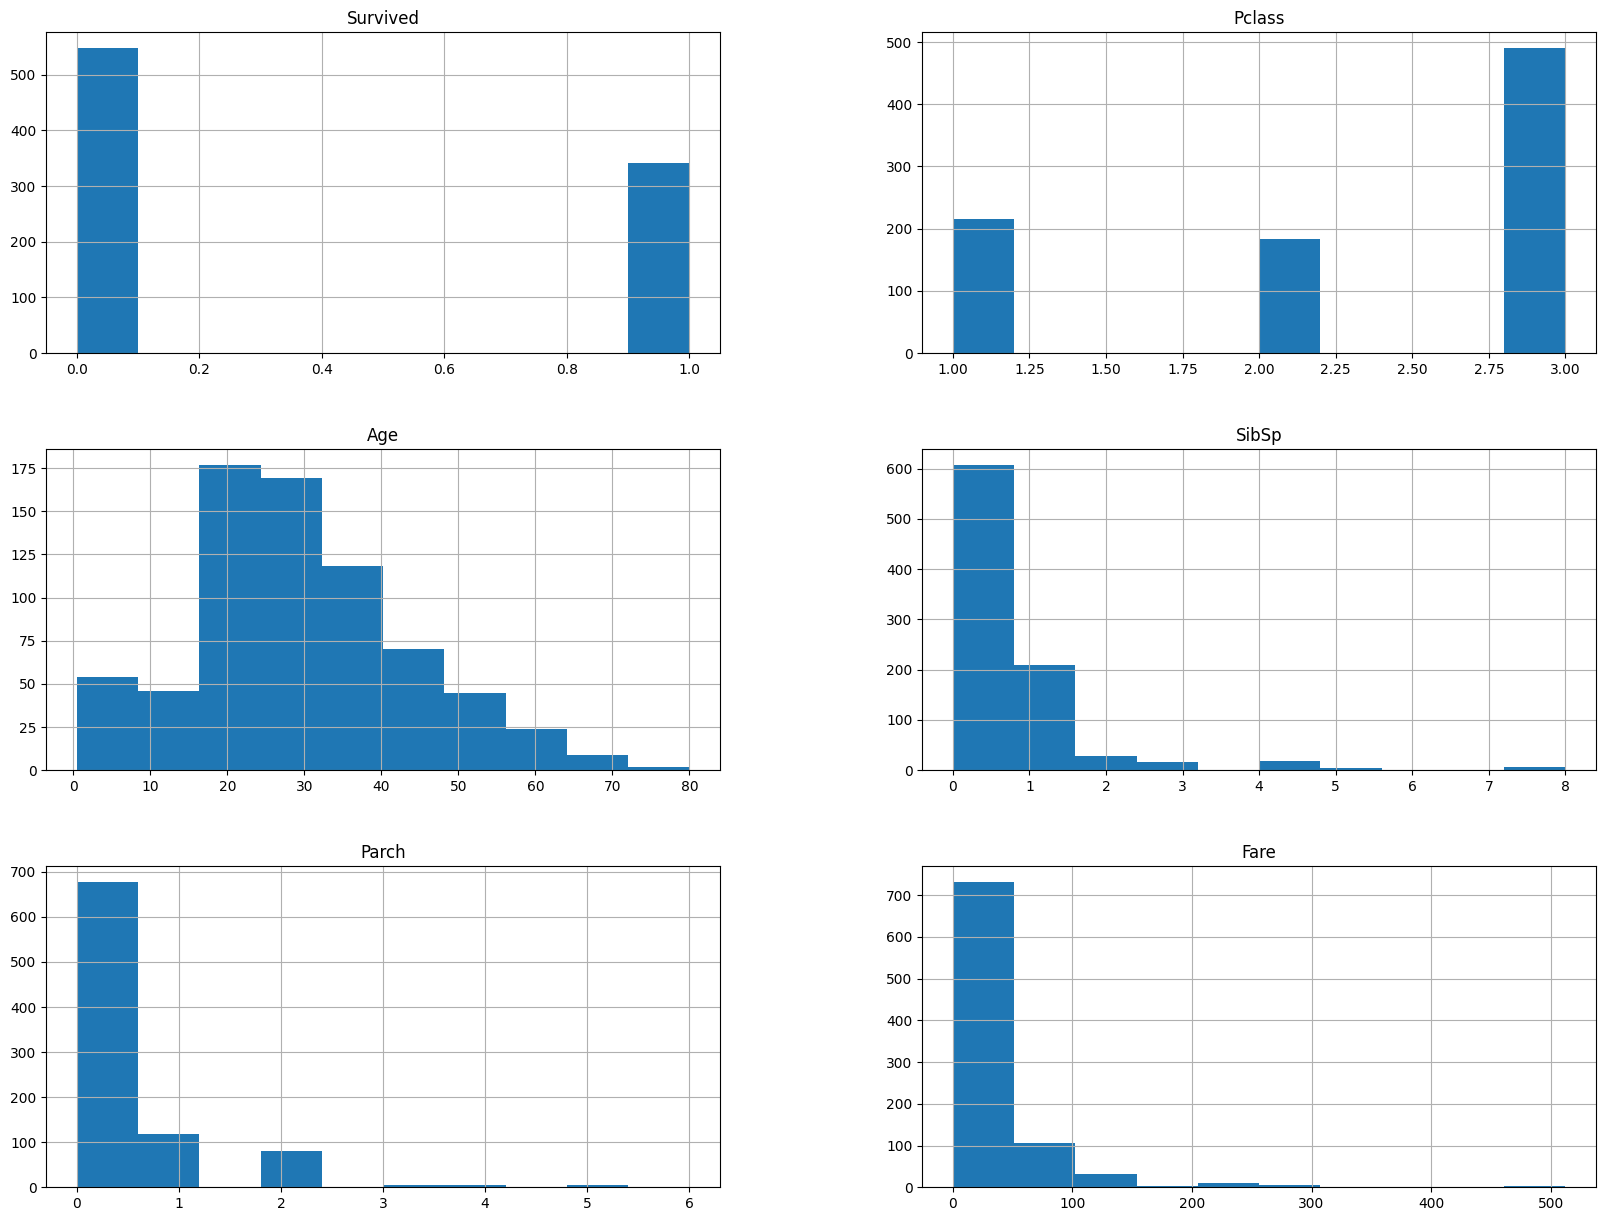

In [14]:
train.hist(figsize=(20,15))

In [15]:
train['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

### Гипотеза 1: Женщины выживали чаще, так как мужчины возможно спасали свои семьи

Text(0.5, 1.0, 'Survival count by Sex')

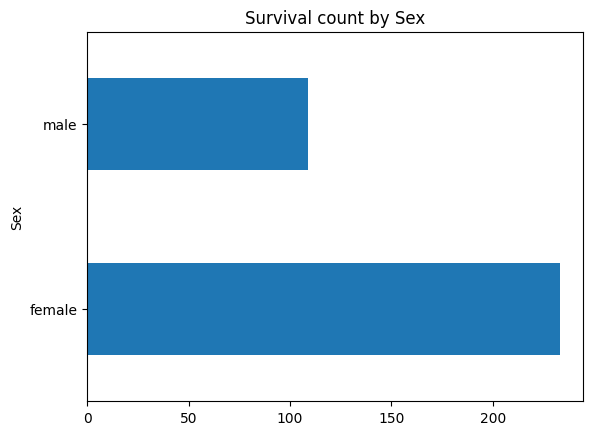

In [16]:
train.groupby('Sex')['Survived'].sum().plot(kind='barh')

plt.title('Survival count by Sex')

### Гипотеза 2: Более молодые пассажиры выживали чаще

In [17]:
train['Age_Group'] = pd.cut(train['Age'], bins=[0,18,30,50,100])

C:\Users\Владимир\AppData\Local\Temp\ipykernel_18772\2700489237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('Age_Group')['Survived'].sum().plot(kind='barh')


<Axes: ylabel='Age_Group'>

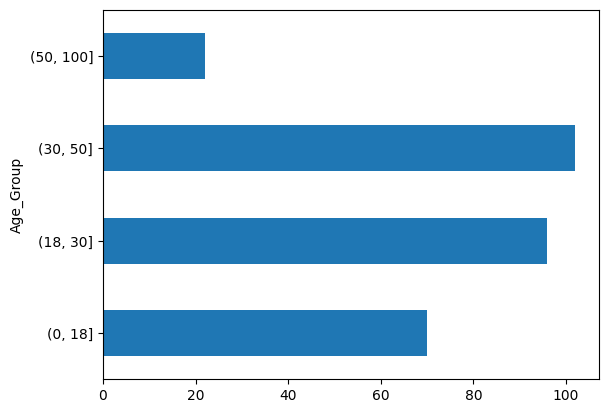

In [18]:
train.groupby('Age_Group')['Survived'].sum().plot(kind='barh')

### Гиптоза 3: Больше выжило тех, кто был в первом классе

<Axes: ylabel='Pclass'>

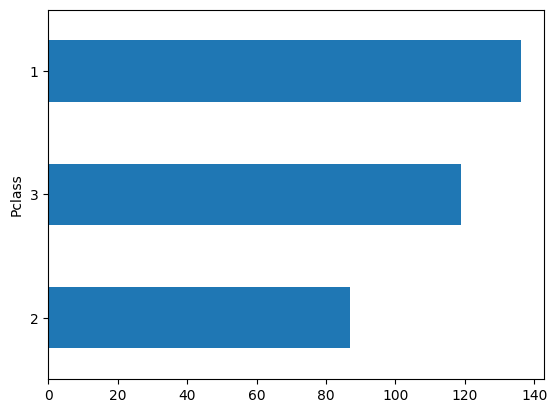

In [19]:
train.groupby('Pclass')['Survived'].sum().sort_values().plot(kind='barh')

In [20]:
train.groupby('Parch')['Survived'].sum()

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [21]:
train.groupby('SibSp')['Survived'].sum()

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

### Гипотеза: У пассажиоров III-го класска не было кают

In [22]:
train.groupby('Pclass')['Cabin'].count()

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

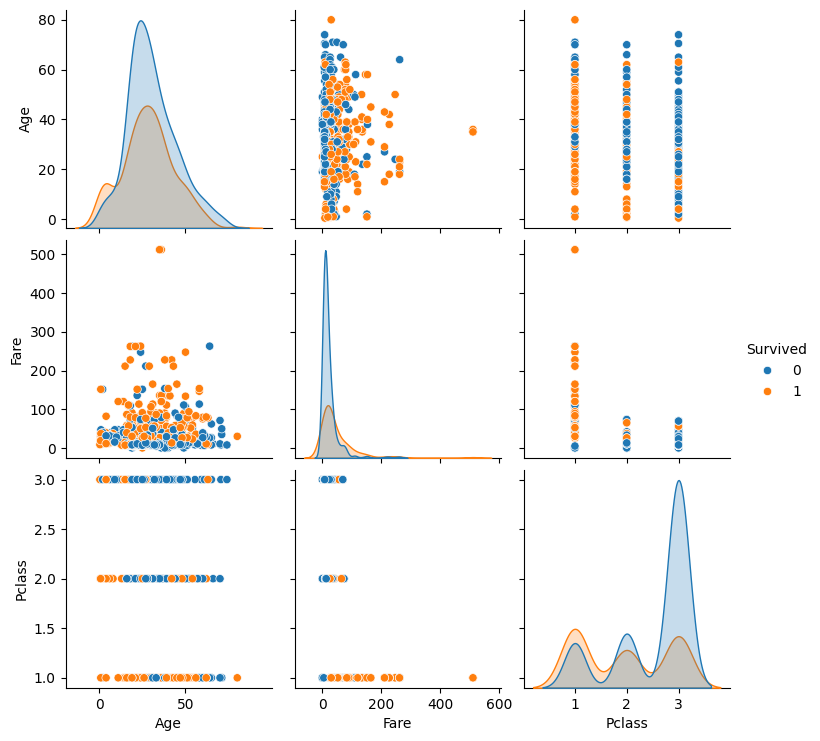

In [23]:
sns.pairplot(train[['Age','Fare','Pclass','Survived']], hue='Survived')

In [24]:
pd.crosstab(train['Sex'], train['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


## Feature Engineering

In [25]:
train['Cabin'].str[0].fillna('U').value_counts()

Cabin
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [26]:
train.groupby(['Sex','Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

### Custom Funtions for Feature Engeneering

In [27]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [28]:
def age_transformer(df):
    df = df.copy()
    df["Age"] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

    return df["Age"].to_frame()

In [29]:
def family_size(df):
    df = df.copy()
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

    return df[['FamilySize', 'IsAlone']]

In [30]:
def has_cabin(df):
    df = df.copy()
    df['HasCabin'] = df["Cabin"].notnull().astype(int)

    return df['HasCabin'].to_frame()

### Pipelines and Column Transformers

In [31]:
age_transform = FunctionTransformer(age_transformer)
family_transform = FunctionTransformer(family_size)
cabin_transform = FunctionTransformer(has_cabin)

In [32]:
age_pipe = Pipeline(
    steps=[
        ('age_imputer', age_transform),
        ('age_scaler', StandardScaler())
    ]
)

In [33]:
numeric_pipe = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer(strategy='median')),
        ('num_scale', StandardScaler())
    ]
)

In [34]:
embarked_pipe = Pipeline(
    steps=[
        ('embarked_imputer', SimpleImputer(strategy='most_frequent')),
        ('embarked_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age', age_pipe, ['Age', 'Pclass', 'Sex']),
        ('cabin', cabin_transform, ['Cabin']),
        ('family', family_transform, ['SibSp', 'Parch']),
        ('num', numeric_pipe, ['Fare']),
        ('embarked', embarked_pipe, ['Embarked']),
        ('sex', OrdinalEncoder(), ['Sex']),
        ('drop', 'drop', ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age', 'Age_Group'])
    ],
    remainder='passthrough'
)

In [36]:
rf_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf_clf', RandomForestClassifier(random_state=42))
    ]
)

In [37]:
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('rf_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('cabin', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
y_pred = rf_pipeline.predict(X_test)

In [39]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.862595,0.743590,0.818182,0.803093,0.819321
recall,0.849624,0.763158,0.818182,0.806391,0.818182
f1-score,0.856061,0.753247,0.818182,0.804654,0.818674
support,266.000000,152.000000,0.818182,418.000000,418.000000


In [40]:
precision_score(y_test, y_pred)

0.7435897435897436

In [41]:
recall_score(y_test, y_pred)

0.7631578947368421

In [42]:
gb_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('gb_clf', GradientBoostingClassifier(random_state=42))
    ]
)

In [43]:
gb_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('gb_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('cabin', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
y_pred = gb_pipeline.predict(X_test)

In [45]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.933333,0.905405,0.923445,0.919369,0.923178
recall,0.947368,0.881579,0.923445,0.914474,0.923445
f1-score,0.940299,0.893333,0.923445,0.916816,0.923220
support,266.000000,152.000000,0.923445,418.000000,418.000000


In [46]:
svm_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('svm_clf', SVC(random_state=42))
    ]
)

In [47]:
svm_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('cabin', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y_pred = svm_pipeline.predict(X_test)

In [49]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.977099,0.935897,0.961722,0.956498,0.962117
recall,0.962406,0.960526,0.961722,0.961466,0.961722
f1-score,0.969697,0.948052,0.961722,0.958874,0.961826
support,266.000000,152.000000,0.961722,418.000000,418.000000


In [50]:
log_reg_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('log_reg', LogisticRegression())
    ]
)

In [51]:
log_reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('cabin', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
y_pred = log_reg_pipeline.predict(X_test)

In [53]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.980392,0.901840,0.949761,0.941116,0.951828
recall,0.939850,0.967105,0.949761,0.953477,0.949761
f1-score,0.959693,0.933333,0.949761,0.946513,0.950108
support,266.000000,152.000000,0.949761,418.000000,418.000000


### Выбираем модель SVM и пробуем тюнить

In [54]:
# Параметры для GridSearch
param_grid = {
    'svm_clf__C': [1, 2, 3, 4, 4.1, 4.2, 4.3, 4.5, 5],
    'svm_clf__kernel': ['rbf'],
    'svm_clf__gamma': [0.01, 0.1]
}

In [55]:
svc_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [56]:
svc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'svm_clf__C': [1, 2, ...], 'svm_clf__gamma': [0.01, 0.1], 'svm_clf__kernel': ['rbf']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('age', ...), ('cabin', ...), ...]"


In [57]:
svc_grid.best_params_

{'svm_clf__C': 4, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}

In [58]:
y_pred = svc_grid.predict(X_test)

In [59]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.977186,0.941935,0.964115,0.959561,0.964368
recall,0.966165,0.960526,0.964115,0.963346,0.964115
f1-score,0.971645,0.951140,0.964115,0.961392,0.964188
support,266.000000,152.000000,0.964115,418.000000,418.000000


In [60]:
best_model = svc_grid.best_estimator_

In [62]:
joblib.dump(best_model, "../model/best_model.pkl")

['../model/best_model.pkl']